In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df=pd.read_csv('fer2013.csv')

In [3]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [4]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [5]:
emotion_labels = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
emotion_labels.get(0)

'anger'

In [6]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).astype('float32'))
img_array = np.stack(img_array, axis=0)


In [7]:
img_array.shape

(35887, 2304)

(48, 48)


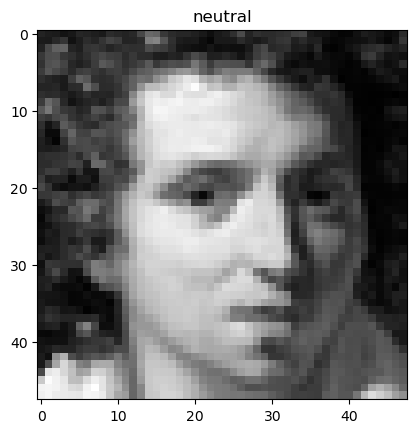

In [8]:

image=img_array[1000].reshape(48,48)
print(image.squeeze().shape)
image=image.squeeze()
fig = plt.figure()
plt.imshow(image, cmap='gray')
plt.title(emotion_labels.get(df['emotion'].iloc[1000]))
plt.show()


In [9]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

my_labels=df['emotion'].values
# le = LabelEncoder()
# labels = le.fit_transform(my_labels)
# labels = np_utils.to_categorical(labels)
# labels.shape

2023-11-25 18:07:09.682833: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import confusion_matrix

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_array, my_labels,
                                                    shuffle=True, stratify=my_labels,
                                                    test_size=0.2, random_state=42)



    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28709, 2304), (7178, 2304), (28709,), (7178,))

In [12]:
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model_svm = SVC(kernel='rbf',gamma=0.1,C=3)  

model_svm.fit(X_train, y_train)

y_pred =model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:

# Make predictions
y_pred = model_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print other metrics like precision, recall, and F1-score
print(classification_report(y_test, y_pred))

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
svc = SVC()
parameters = {
#     'kernel': ['linear', 'rbf','sigmoid','poly'],
    'kernel': [ 'rbf'],

    'C': [10],
    'gamma':[0.01],
#     'degree':[2,3,4,5]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, np.array(y_train))

print_results(cv)

In [ ]:
best_model=cv.best_estimator_
best_score=cv.best_score_
print(best_score)

In [ ]:
import matplotlib.pyplot as plt
i=4
y_pred=best_model.predict(X_test)
y_true=(np.array(y_test))[i]


px=X_test[i]
px = np.array(px.reshape(48, 48).astype('float32'))
val= emotion_label_to_text.get(y_true)
print("emotion:",val)
val_pred= emotion_label_to_text.get(y_pred[i])

print("Predicted emotion:",val_pred)
# print(val)
plt.imshow(px, cmap='gray')